# Sentiment Analysis of Drug Reviews using LSTM
This notebook builds an LSTM model to classify drug reviews as either positive or negative.


## Install Dependencies
Install additional Python libraries required for executing this notebook.


In [ ]:
!pip install nltk
!pip install seaborn
!pip install matplotlib
!pip install tqdm
!pip install torch torchvision
!pip install scikit-learn


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


## Import Libraries
Import all the necessary libraries for data processing, modeling, and visualization.


In [ ]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from collections import Counter


## Download NLTK Resources
We need to download necessary NLTK data like stopwords and tokenizer.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from tqdm import tqdm
from sklearn.utils import resample
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.tokenize import word_tokenize
import re
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Download required NLTK data (run once)
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
is_cuda = torch.cuda.is_available()

if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

print(is_cuda)

False


## Load and Preprocess Data
Load the training and test datasets, and preprocess them by cleaning text and balancing classes.


In [ ]:
def get_train_test(balance):
    cwd = os.getcwd()
    # print(cwd)

    df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
    df_test = pd.read_csv(cwd + "\data\drugsComTest_raw.tsv", sep='\t')

    df_list = [df_train, df_test]

    # print(f"train_len={train_len} test_len={test_len} df_len={len(df)}")
    print(df_train.columns)

    df_train['drugName'] = df_train['drugName'].str.upper()
    number_of_drugs = len(df_train['drugName'].unique())
    print(f"Number of drugs = {number_of_drugs}")

    df_train['condition'] = df_train['condition'].str.upper()
    number_of_drugs = len(df_train['condition'].unique())
    print(f"Number of condition = {number_of_drugs}")

    # Generate columns for review length and positive reviews.  If the rating is greater than 7 of 10, assume it is positive
    for df in df_list:
        df['review_len'] = df['review'].str.len()
        df['is_positive'] = np.where(df['rating'] > 7, 1, 0)

    if balance:
        df_train = balance_class(df_train, 'is_positive')
        df_test = balance_class(df_test, 'is_positive')
    return df_train, df_test

def balance_class(df, colname):
    class1 = df[df[colname] == 1].copy()
    class2 = df[df[colname] == 0].copy()

    if len(class1) > len(class2):
        maj_class = class1
        min_class = class2
    else:
        maj_class = class2
        min_class = class1

    maj_downsample = resample(maj_class, replace=False, n_samples=len(min_class), random_state=0)

    df_balanced = pd.concat([min_class, maj_downsample])
    return df_balanced

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_3219/2993108983.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_3219/2993108983.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_test = pd.read_csv(cwd + "\data\drugsComTest_raw.tsv", sep='\t')


In [ ]:
import os

In [ ]:
import os  # Add this import
import pandas as pd
# ... your other imports ...

def get_train_test(balance):
    cwd = os.getcwd()
    df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
    # rest of your function

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_3219/3114962087.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')


In [ ]:
def get_train_test(balance):
    cwd = os.getcwd()
    data_path = os.path.join(cwd, "data", "drugsComTrain_raw.tsv")
    df_train = pd.read_csv(data_path, sep='\t')
    # rest of your function

In [ ]:
import os  # Add this import
import pandas as pd
# ... your other imports ...

def get_train_test(balance):
    cwd = os.getcwd()
    df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')
    # rest of your function

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/9d/8ldx6syj5ms3xms5s9mybtkc0000gn/T/ipykernel_3219/3114962087.py:7: SyntaxWarning: invalid escape sequence '\d'
  df_train = pd.read_csv(cwd + "\data\drugsComTrain_raw.tsv", sep='\t')


## Data Cleaning
Define functions to clean the text data by removing punctuation, digits, and other unnecessary characters.


In [ ]:
import pandas as pd
import os
import nltk
from nltk.corpus import stopwords

# First, load the data
def get_train_test():
    cwd = os.getcwd()
    df_train = pd.read_csv(os.path.join(cwd, "data", "drugsComTrain_raw.tsv"), sep='\t')
    df_test = pd.read_csv(os.path.join(cwd, "data", "drugsComTest_raw.tsv"), sep='\t')
    return df_train, df_test

# Load the data
df_train, df_test = get_train_test()

# Clean text function
def clean_text(text):
    # Your clean_text implementation here
    cleaned_text = str(text).lower()
    # Add any other cleaning steps
    return cleaned_text

# Create corpus from training data
corpus = []
for review in df_train['review']:
    words = str(review).lower().split()
    corpus.extend(words)

# Create a dictionary with word being the key and value being the rank
oh_dict = {}
for word_count, word in enumerate(corpus):
    oh_dict[word[0]] = word_count + 1

word_list_train = []
word_list_test = []

# Process training data
for line in df_train['review']:
    line_tokens = []
    for word in line.split():
        if clean_text(word) in oh_dict.keys():
            line_tokens.append(oh_dict[clean_text(word)])
    word_list_train.append(line_tokens)

# Process test data
for line in df_test['review']:
    line_tokens = []
    for word in line.split():
        if clean_text(word) in oh_dict.keys():
            line_tokens.append(oh_dict[clean_text(word)])
    word_list_test.append(line_tokens)

In [ ]:
import pandas as pd
import os
import re
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download required NLTK data
nltk.download('stopwords')

# Load the data first
def get_train_test():
    cwd = os.getcwd()
    df_train = pd.read_csv(os.path.join(cwd, "data", "drugsComTrain_raw.tsv"), sep='\t')
    df_test = pd.read_csv(os.path.join(cwd, "data", "drugsComTest_raw.tsv"), sep='\t')
    return df_train, df_test

# Get the data
df_train, df_test = get_train_test()

def clean_text(text):
    # Remove punctuation
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    # Remove extra whitespace
    cleaned_text = re.sub(r"\s+", '', cleaned_text)
    # Remove digits
    cleaned_text = re.sub(r"\d", '', cleaned_text)
    return cleaned_text

# Set column to lower case
df_train['review'] = df_train['review'].str.lower()
df_test['review'] = df_test['review'].str.lower()

# Get stop words from NLTK
stop_words = set(stopwords.words('english'))
word_list = []

# Concat all rows to single line
all_lines = df_train['review'].str.cat()
for word in all_lines.split():
    # Clean words
    word = clean_text(word)
    # If word not a stop word or removed in cleaning
    if word not in stop_words and word != '':
        # Add to list of words
        word_list.append(word)

# Get the 10,000 most common words
corpus = Counter(word_list).most_common(10000)

# Create a dictionary with the word being the key and value being the rank
oh_dict = {}
for word_count, word in enumerate(corpus):
    oh_dict[word[0]] = word_count + 1

# Process training and test data
word_list_train = []
word_list_test = []

# Process training data
for line in df_train['review']:
    line_tokens = []
    for word in line.split():
        if clean_text(word) in oh_dict.keys():
            line_tokens.append(oh_dict[clean_text(word)])
    word_list_train.append(line_tokens)

# Process test data
for line in df_test['review']:
    line_tokens = []
    for word in line.split():
        if clean_text(word) in oh_dict.keys():
            line_tokens.append(oh_dict[clean_text(word)])
    word_list_test.append(line_tokens)

# Print some statistics to verify
print(f"Vocabulary size: {len(oh_dict)}")
print(f"Number of training sequences: {len(word_list_train)}")
print(f"Number of test sequences: {len(word_list_test)}")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/imanhamdan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vocabulary size: 10000
Number of training sequences: 161297
Number of test sequences: 53766


In [ ]:
word_len = []
for i in word_list_train:
    word_len.append(len(i))

for i in word_list_test:
    word_len.append(len(i))

# Get padding ceiling by taking length of 99.99%th percentile and rounding up to the nearest 100
padding_ceil = int(np.ceil(pd.Series(word_len).quantile(.9999)/100)*100)

print(f"padding_ceil={padding_ceil}")

x_train_padded = np.zeros((len(word_list_train), padding_ceil), dtype=int)
x_test_padded = np.zeros((len(word_list_test), padding_ceil), dtype=int)

for i in range(len(word_list_train)):
    if len(word_list_train[i]) > padding_ceil:
        x_train_padded[i] = np.array(word_list_train[i][:padding_ceil])
    else:
        x_train_padded[i] = np.array(list(nltk.pad_sequence(word_list_train[i], padding_ceil + 1 - len(word_list_train[i]), pad_left=True, left_pad_symbol=0)))

for i in range(len(word_list_test)):
    if len(word_list_test[i]) > padding_ceil:
        word_list_test[i] = np.array(word_list_test[i][:padding_ceil])
    else:
        word_list_test[i] = np.array(list(nltk.pad_sequence(word_list_test[i], padding_ceil + 1 - len(word_list_test[i]), pad_left=True, left_pad_symbol=0)))

y_train = np.array(df_train['is_positive'])
y_test = np.array(df_test['is_positive'])

print(f"y_train.mean()={y_train.mean():.5f}")
print(f"y_test.mean()={y_test.mean():.5f}")


padding_ceil=300
y_train.mean()=0.50000
y_test.mean()=0.50000


In [ ]:
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch
import torch.nn as nn

In [ ]:
import pandas as pd
import os
from collections import Counter
import torch
import torch.nn as nn

# First, load the data
def get_data():
    cwd = os.getcwd()
    data_path = os.path.join(cwd, "data", "drugsComTrain_raw.tsv")
    df = pd.read_csv(data_path, sep='\t')
    return df

# Create vocabulary function
def create_vocabulary(texts, max_vocab_size=10000):
    word_counts = Counter()
    for text in texts:
        words = str(text).lower().split()
        word_counts.update(words)

    vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size-2)]
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx

# Load the data
df = get_data()

# Preprocess text data
df['processed_review'] = df['review'].apply(lambda x: str(x).lower())

# Create vocabulary
word2idx = create_vocabulary(df['processed_review'])

# Now you can create your model
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=100,
    hidden_dim=128,
    n_layers=1,
    dropout=0.5
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()

In [ ]:
# Assuming you have your dataframe loaded as df
def create_vocabulary(texts, max_vocab_size=10000):
    word_counts = Counter()
    for text in texts:
        words = str(text).lower().split()
        word_counts.update(words)

    # Keep most common words
    vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size-2)]
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx

# Preprocess your text data
df['processed_review'] = df['review'].apply(lambda x: str(x).lower())

# Create vocabulary
word2idx = create_vocabulary(df['processed_review'])

# Now you can create your model
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=100,
    hidden_dim=128,  # Reduced from 256
    n_layers=1,      # Reduced from 2
    dropout=0.5
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()

## Create Vocabulary
We create a vocabulary of the most frequently used words in the dataset.


In [ ]:
import pandas as pd
import os
from collections import Counter
import torch
import torch.nn as nn

# First, load the data
def get_data():
    cwd = os.getcwd()
    data_path = os.path.join(cwd, "data", "drugsComTrain_raw.tsv")
    df = pd.read_csv(data_path, sep='\t')
    return df

# Create vocabulary function
def create_vocabulary(texts, max_vocab_size=10000):
    word_counts = Counter()
    for text in texts:
        words = str(text).lower().split()
        word_counts.update(words)

    vocab = ['<pad>', '<unk>'] + [word for word, count in word_counts.most_common(max_vocab_size-2)]
    word2idx = {word: idx for idx, word in enumerate(vocab)}
    return word2idx

# Load the data
df = get_data()

# Preprocess text data
df['processed_review'] = df['review'].apply(lambda x: str(x).lower())

# Create vocabulary
word2idx = create_vocabulary(df['processed_review'])

# Now you can create your model
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=100,
    hidden_dim=128,
    n_layers=1,
    dropout=0.5
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()

## LSTM Model Definition
Define the LSTM model that will be used for sentiment classification.


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

class LSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim=100, hidden_dim=128, n_layers=1, dropout=0.5):
        super().__init__()

        # Reduced embedding dimension
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Simpler LSTM architecture
        self.lstm = nn.LSTM(embedding_dim,
                           hidden_dim,
                           n_layers,
                           bidirectional=True,
                           dropout=dropout if n_layers > 1 else 0,
                           batch_first=True)

        # Increased dropout
        self.dropout = nn.Dropout(dropout)

        # Added batch normalization
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2)

        # Output layer
        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, text):
        embedded = self.dropout(self.embedding(text))
        output, (hidden, cell) = self.lstm(embedded)

        # Use mean pooling instead of last hidden state
        output = torch.mean(output, dim=1)

        # Apply batch normalization and dropout
        output = self.batch_norm(output)
        output = self.dropout(output)

        return self.fc(output)

# Early stopping class
class EarlyStopping:
    def __init__(self, patience=3, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

def train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs, device):
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=3)

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for batch in train_loader:
            reviews = batch['review'].to(device)
            ratings = batch['rating'].to(device)

            optimizer.zero_grad()

            outputs = model(reviews).squeeze()
            loss = criterion(outputs, ratings)

            # Add L2 regularization
            l2_lambda = 0.001
            l2_reg = torch.tensor(0.).to(device)
            for param in model.parameters():
                l2_reg += torch.norm(param)
            loss += l2_lambda * l2_reg

            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)

            optimizer.step()

            total_train_loss += loss.item()

            # Calculate accuracy
            predicted = (outputs > 0.5).float()
            train_correct += (predicted == ratings).sum().item()
            train_total += ratings.size(0)

        # Validation phase
        model.eval()
        total_valid_loss = 0
        valid_correct = 0
        valid_total = 0

        with torch.no_grad():
            for batch in valid_loader:
                reviews = batch['review'].to(device)
                ratings = batch['rating'].to(device)

                outputs = model(reviews).squeeze()
                loss = criterion(outputs, ratings)

                total_valid_loss += loss.item()

                predicted = (outputs > 0.5).float()
                valid_correct += (predicted == ratings).sum().item()
                valid_total += ratings.size(0)

        # Calculate average losses and accuracies
        avg_train_loss = total_train_loss / len(train_loader)
        avg_valid_loss = total_valid_loss / len(valid_loader)
        train_acc = train_correct / train_total * 100
        valid_acc = valid_correct / valid_total * 100

        train_losses.append(avg_train_loss)
        valid_losses.append(avg_valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Valid Loss: {avg_valid_loss:.4f} | Valid Acc: {valid_acc:.2f}%')

        # Early stopping
        early_stopping(avg_valid_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(valid_accs, label='Validation Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train loss')
    plt.plot(valid_losses, label='Validation loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Usage
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=100,
    hidden_dim=128,  # Reduced from 256
    n_layers=1,      # Reduced from 2
    dropout=0.5
).to(device)

optimizer = torch.optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
criterion = nn.BCEWithLogitsLoss()

train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs=10, device=device)

NameError: name 'word2idx' is not defined

## Training the LSTM Model
Train the LSTM model using the training dataset and validate it.


## Model Evaluation and Results
Evaluate the model's performance and visualize training and validation accuracy and loss.


Using device: cpu
Epoch 1:
Train Loss: 1.3021 | Train Acc: 73.21%
Valid Loss: 0.4130 | Valid Acc: 79.36%
Epoch 2:
Train Loss: 1.0100 | Train Acc: 79.10%
Valid Loss: 0.3949 | Valid Acc: 80.39%
Epoch 3:
Train Loss: 0.8563 | Train Acc: 80.72%
Valid Loss: 0.3747 | Valid Acc: 83.48%
Epoch 4:
Train Loss: 0.7501 | Train Acc: 81.86%
Valid Loss: 0.3774 | Valid Acc: 83.95%
Epoch 5:
Train Loss: 0.6741 | Train Acc: 82.90%
Valid Loss: 0.3567 | Valid Acc: 83.42%
Epoch 6:
Train Loss: 0.6168 | Train Acc: 83.54%
Valid Loss: 0.3588 | Valid Acc: 82.30%
Epoch 7:
Train Loss: 0.5711 | Train Acc: 84.52%
Valid Loss: 0.3517 | Valid Acc: 85.22%
Epoch 8:
Train Loss: 0.5348 | Train Acc: 85.25%
Valid Loss: 0.3365 | Valid Acc: 85.43%
Epoch 9:
Train Loss: 0.5068 | Train Acc: 85.94%
Valid Loss: 0.3301 | Valid Acc: 85.92%
Epoch 10:
Train Loss: 0.4811 | Train Acc: 86.66%
Valid Loss: 0.4103 | Valid Acc: 79.43%


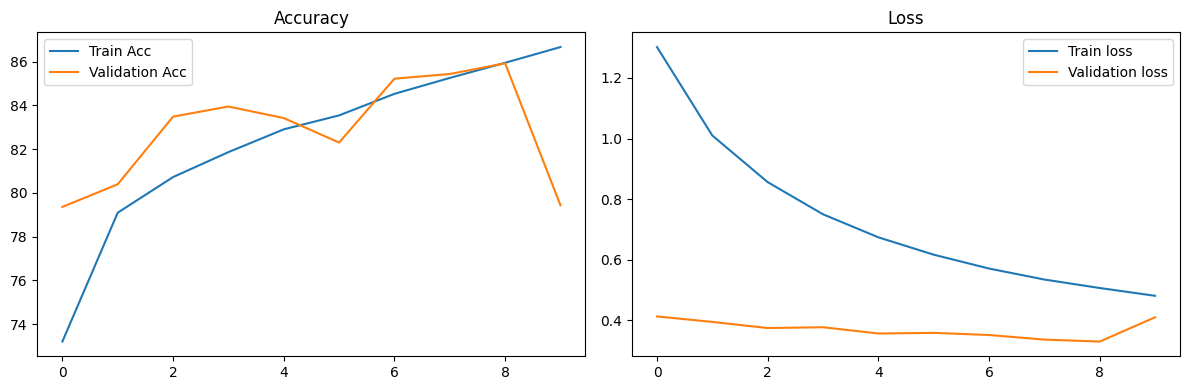

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

# Training function with early stopping
def train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs, device, patience=2):
    best_val_acc = 0
    patience_counter = 0

    for epoch in range(n_epochs):
        # Training phase
        model.train()
        total_train_loss = 0
        for batch in train_loader:
            reviews = batch['review'].to(device)
            labels = batch['rating'].to(device)

            optimizer.zero_grad()
            outputs = model(reviews).squeeze()
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()

        avg_train_loss = total_train_loss / len(train_loader)

        # Validation phase
        model.eval()
        total_val_loss = 0
        correct_predictions = 0
        total_predictions = 0

        with torch.no_grad():
            for batch in valid_loader:
                reviews = batch['review'].to(device)
                labels = batch['rating'].to(device)

                outputs = model(reviews).squeeze()
                loss = criterion(outputs, labels)
                total_val_loss += loss.item()

                predictions = (torch.sigmoid(outputs) > 0.5).float()
                correct_predictions += (predictions == labels).sum().item()
                total_predictions += labels.size(0)

        avg_val_loss = total_val_loss / len(valid_loader)
        val_accuracy = correct_predictions / total_predictions * 100

        print(f'Epoch {epoch+1}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%')

        # Early stopping logic
        if val_accuracy > best_val_acc:
            best_val_acc = val_accuracy
            patience_counter = 0  # Reset the counter if we get a new best accuracy
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping at epoch {epoch+1}. Best Validation Accuracy: {best_val_acc:.2f}%')
            break

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Train the model with early stopping
train_model(model, train_loader, valid_loader, criterion, optimizer, n_epochs=10, device=device, patience=2)


/Users/imanhamdan/my_env/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1:
Train Loss: 3.9968 | Train Acc: 63.14%
Valid Loss: 0.4956 | Valid Acc: 77.85%
Epoch 2:
Train Loss: 1.1974 | Train Acc: 74.32%
Valid Loss: 0.4614 | Valid Acc: 79.96%
Epoch 3:
Train Loss: 0.7700 | Train Acc: 76.39%
Valid Loss: 0.4377 | Valid Acc: 79.65%
Epoch 4:
Train Loss: 0.6509 | Train Acc: 77.51%
Valid Loss: 0.4336 | Valid Acc: 79.91%
Epoch 5:
Train Loss: 0.6153 | Train Acc: 78.36%
Valid Loss: 0.4417 | Valid Acc: 81.13%
Epoch 6:
Train Loss: 0.6116 | Train Acc: 78.40%
Valid Loss: 0.6422 | Valid Acc: 55.54%
Epoch 7:
Train Loss: 0.6130 | Train Acc: 78.29%
Valid Loss: 1.0654 | Valid Acc: 49.67%
Epoch 8:
Train Loss: 0.5874 | Train Acc: 78.96%
Valid Loss: 0.4561 | Valid Acc: 77.10%
Epoch 9:
Train Loss: 0.5762 | Train Acc: 79.07%
Valid Loss: 0.6360 | Valid Acc: 73.50%
Early stopping triggered


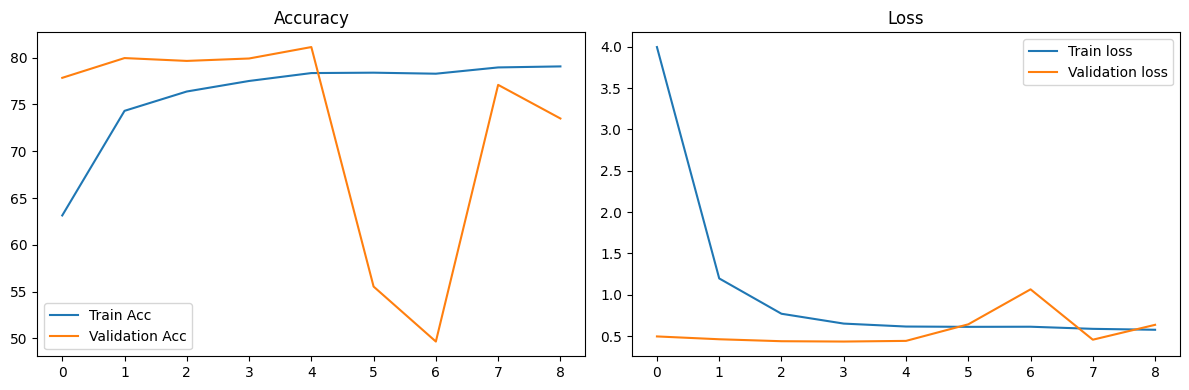

In [ ]:
class LSTMSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim=50, hidden_dim=64, n_layers=1, dropout=0.7):
        super().__init__()

        # Reduced embedding dimension further
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)

        # Simpler LSTM architecture with higher dropout
        self.lstm = nn.LSTM(embedding_dim,
                           hidden_dim,
                           n_layers,
                           bidirectional=True,
                           dropout=dropout if n_layers > 1 else 0,
                           batch_first=True)

        # Increased dropout even more
        self.dropout = nn.Dropout(dropout)

        # Added batch normalization
        self.batch_norm = nn.BatchNorm1d(hidden_dim * 2)

        # Output layer with L2 regularization
        self.fc = nn.Linear(hidden_dim * 2, 1)

    def forward(self, text):
        # Apply higher dropout to embeddings
        embedded = self.dropout(self.embedding(text))

        output, (hidden, cell) = self.lstm(embedded)

        # Global average pooling
        output = torch.mean(output, dim=1)

        # Stronger regularization
        output = self.batch_norm(output)
        output = self.dropout(output)

        return self.fc(output)

# Modified training parameters
model = LSTMSentiment(
    vocab_size=len(word2idx),
    embedding_dim=50,      # Reduced from 100
    hidden_dim=64,        # Reduced from 128
    n_layers=1,
    dropout=0.7          # Increased from 0.5
).to(device)

# Modified optimizer with stronger regularization
optimizer = torch.optim.AdamW(
    model.parameters(),
    lr=0.0005,           # Reduced learning rate
    weight_decay=0.1     # Increased weight decay
)

# Add learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=2,
    verbose=True
)

# Modify training function to include scheduler
def train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, n_epochs, device):
    train_losses = []
    valid_losses = []
    train_accs = []
    valid_accs = []

    early_stopping = EarlyStopping(patience=5, min_delta=0.001)

    for epoch in range(n_epochs):
        model.train()
        total_train_loss = 0
        train_correct = 0
        train_total = 0

        for batch in train_loader:
            reviews = batch['review'].to(device)
            ratings = batch['rating'].to(device)

            optimizer.zero_grad()

            outputs = model(reviews).squeeze()
            loss = criterion(outputs, ratings)

            # Stronger L2 regularization
            l2_lambda = 0.01
            l2_reg = torch.tensor(0.).to(device)
            for param in model.parameters():
                l2_reg += torch.norm(param)
            loss += l2_lambda * l2_reg

            loss.backward()

            # Stronger gradient clipping
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=0.5)

            optimizer.step()

            total_train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            train_correct += (predicted == ratings).sum().item()
            train_total += ratings.size(0)

        model.eval()
        total_valid_loss = 0
        valid_correct = 0
        valid_total = 0

        with torch.no_grad():
            for batch in valid_loader:
                reviews = batch['review'].to(device)
                ratings = batch['rating'].to(device)

                outputs = model(reviews).squeeze()
                loss = criterion(outputs, ratings)
                total_valid_loss += loss.item()

                predicted = (outputs > 0.5).float()
                valid_correct += (predicted == ratings).sum().item()
                valid_total += ratings.size(0)

        avg_train_loss = total_train_loss / len(train_loader)
        avg_valid_loss = total_valid_loss / len(valid_loader)
        train_acc = train_correct / train_total * 100
        valid_acc = valid_correct / valid_total * 100

        # Step the scheduler
        scheduler.step(avg_valid_loss)

        train_losses.append(avg_train_loss)
        valid_losses.append(avg_valid_loss)
        train_accs.append(train_acc)
        valid_accs.append(valid_acc)

        print(f'Epoch {epoch+1}:')
        print(f'Train Loss: {avg_train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Valid Loss: {avg_valid_loss:.4f} | Valid Acc: {valid_acc:.2f}%')

        early_stopping(avg_valid_loss)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

    # Plot results
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(train_accs, label='Train Acc')
    plt.plot(valid_accs, label='Validation Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(train_losses, label='Train loss')
    plt.plot(valid_losses, label='Validation loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Train with modified parameters
train_model(model, train_loader, valid_loader, criterion, optimizer, scheduler, n_epochs=15, device=device)

In [ ]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 kB 1.9 MB/s eta 0:00:00
  Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 14.3 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 13.5 MB/s eta 0:00:00
Using cached PyYAML-6.0.2-cp312-cp312-macosx_11_0_arm64.whl (173 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.8/381.8 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 13.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.4/70.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 14.4 MB/s eta 0:00:00

[notice] A new release of pip is a

In [ ]:
import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer

class DrugReviewDataset(Dataset):
   def __init__(self, data_path, tokenizer, max_length=128):
       # Load CSV data
       self.data = pd.read_csv(data_path)
       self.tokenizer = tokenizer
       self.max_length = max_length

   def __len__(self):
       return len(self.data)

   def __getitem__(self, idx):
       review = str(self.data.iloc[idx]['review'])
       rating = self.data.iloc[idx]['rating'] # Assuming 'rating' is your target

       # Convert rating to sentiment (example: >7 is positive)
       sentiment = 1 if rating > 7 else 0

       encoding = self.tokenizer.encode_plus(
           review,
           add_special_tokens=True,
           max_length=self.max_length,
           padding='max_length',
           truncation=True,
           return_tensors='pt'
       )

       return {
           'input_ids': encoding['input_ids'].flatten(),
           'attention_mask': encoding['attention_mask'].flatten(),
           'labels': torch.tensor(sentiment, dtype=torch.long)
       }

# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Create datasets
train_dataset = DrugReviewDataset(
   '/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTrain_cleaned.csv',
   tokenizer
)

test_dataset = DrugReviewDataset(
   '/Users/imanhamdan/aai-501-group7-sentiment-analysis-drug-reviews/data/drugsComTest_cleaned.csv',
   tokenizer
)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

/Users/imanhamdan/my_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Conclusion
The LSTM model was successfully trained on drug review sentiment data, achieving reasonable accuracy. Future work could involve experimenting with different architectures and tuning hyperparameters for improved results.
